In [4]:
import torch
import numpy as np
import os
import pydicom as dcm
import numpy as np
import SimpleITK as sitk
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pydicom.pixel_data_handlers.util import apply_modality_lut, apply_voi_lut
from ast import literal_eval
from tqdm import tqdm
from PIL import Image
import shutil
import SimpleITK as sitk


In [7]:
input_path = "C:/Users/keemym/Desktop/dataset_edited/input"
label_path = "C:/Users/keemym/Desktop/dataset_edited/target"

In [8]:
input_list = os.listdir(input_path)
label_list = os.listdir(label_path)

In [9]:
input_list = [input_path +"/" + f for f in input_list]
label_list = [label_path +"/" + f for f in label_list]

In [10]:
import matplotlib.pyplot as plt
from PIL import Image

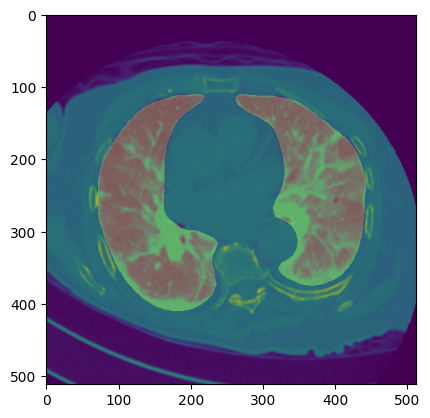

In [11]:
fig, ax = plt.subplots()
num = 2700
# Show the first image on the axis
ax.imshow(Image.open(input_list[num]))

# Show the second image on top of the first image with alpha blending
ax.imshow(Image.open(label_list[num]), alpha=0.3)

# Show the final image
plt.show()

In [12]:
d_path = "C:/Users/keemym/Desktop/manifest-1608266677008/MIDRC-RICORD-1A/MIDRC-RICORD-1A-419639-000082/08-02-2002-NA-CT CHEST WITHOUT CONTRAST-04614/2.000000-ROUTINE CHEST NON-CON-97100/1-095.dcm"


In [15]:
def hu_normalize(dicom_path,center,width): # -1000 to 2400
    window_center = center
    window_width = width

    # CT image
    slice = dcm.read_file(dicom_path)
    s = int(slice.RescaleSlope)
    b = int(slice.RescaleIntercept)
    image = s * slice.pixel_array + b

    # apply_modality_lut( ) & apply_voi_lut( )
    slice.WindowCenter = window_center
    slice.WindowWidth = window_width
    image = apply_modality_lut(image, slice)
    image2 = apply_voi_lut(image, slice)

    # normalization
    image3 = np.clip(image, window_center - (window_width / 2), window_center + (window_width / 2))
    
    return image3

(-0.5, 511.5, 511.5, -0.5)

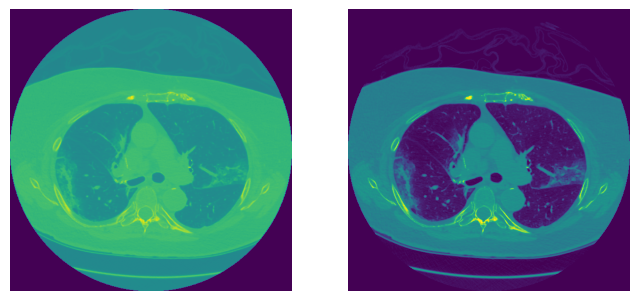

In [32]:
img = dcm.dcmread(d_path).pixel_array

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(hu_normalize(d_path,-1000,2000))
plt.axis('off')